In [1]:
# https://brian2.readthedocs.io/en/stable/resources/tutorials/1-intro-to-brian-neurons.html
# Units
from brian2 import *
print(20*volt)
print(1000*amp)
print(1e6*volt)
print(1000*namp)
print(10*nA*5*Mohm)


20. V
1. kA
1. MV
1. uA
50. mV


In [2]:
# Simple model
start_scope()

tau = 10*ms
eqs = 'dv/dt = (1-v)/tau : 1' # Solution: v = 1 - exp(-t/tau)

G = NeuronGroup(1, eqs)

print('Before v = %s' % G.v[0])
run(100*ms)
print('After v = %s' % G.v[0])

INFO       No numerical integration method specified for group 'neurongroup', using method 'exact' (took 0.03s). [brian2.stateupdaters.base.method_choice]
Before v = 0.0
After v = 0.9999546000702376


Text(0, 0.5, 'v')

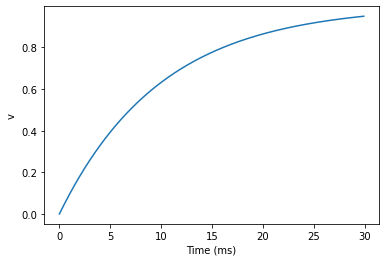

In [3]:
# V graph
start_scope()

G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=True)

run(30*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v')

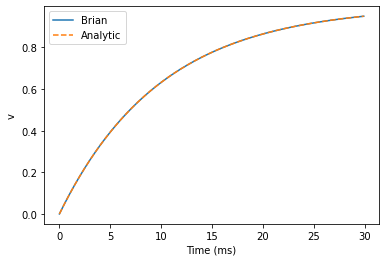

In [4]:
# V graph with expected behaviour
start_scope()

G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=0) # Neuron 0

run(30*ms)

plot(M.t/ms, M.v[0], label='Brian') # Brian simulation
plot(M.t/ms, 1-exp(-M.t/tau), 'C1--',label='Analytic') # Expected behaviour
xlabel('Time (ms)')
ylabel('v')
legend()

Text(0, 0.5, 'v')

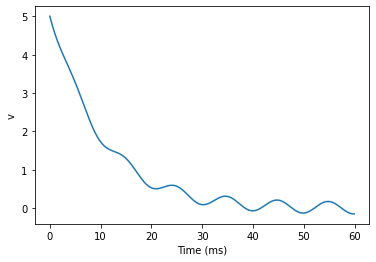

In [5]:
# Euler method
start_scope()

tau = 10*ms
eqs = 'dv/dt = (sin(2*pi*100*Hz*t)-v)/tau : 1'

G = NeuronGroup(1, eqs, method='euler')
M = StateMonitor(G, 'v', record=0) # Neuron 0
G.v = 5 # Initial value

run(60*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v')

Text(0, 0.5, 'v')

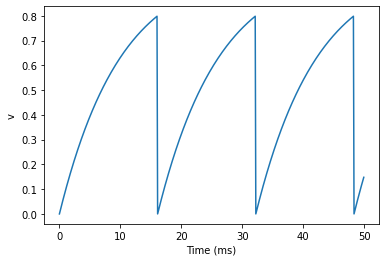

In [6]:
# Spikes
start_scope()

tau = 10*ms
eqs = 'dv/dt = (1-v)/tau : 1' # Solution: v = 1 - exp(-t/tau)

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v=0', method='exact') # Spike fired at v>0.8 and reset
M = StateMonitor(G, 'v', record=0) # Neuron 0

run(50*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v')

In [7]:
# Spike monitor
start_scope()

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v=0', method='exact') # Spike fired at v>0.8 and reset
spikemon = SpikeMonitor(G)

run(50*ms)

print('Spike times: %s' % spikemon.t[:])

Spike times: [16.  32.1 48.2] ms


Text(0, 0.5, 'v')

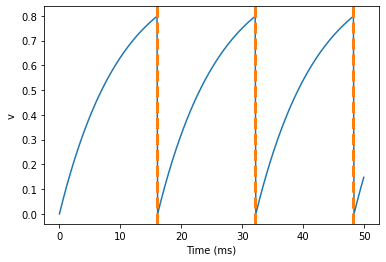

In [8]:
# Spike graph
start_scope()

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v=0', method='exact') # Spike fired at v>0.8 and reset
statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v')

Text(0, 0.5, 'v')

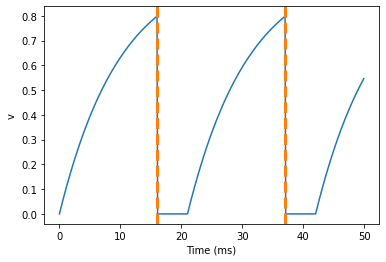

In [9]:
# Refractoriness
start_scope()

tau = 10*ms
eqs = 'dv/dt = (1-v)/tau : 1 (unless refractory)' # Keep v constant during refractory period

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v=0', refractory=5*ms, method='exact')
statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v')

Text(0, 0.5, 'Neuron index')

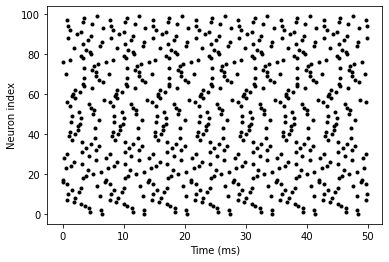

In [10]:
# Multiple neurons raster plot
start_scope()

N = 100 #
tau = 10*ms
eqs = 'dv/dt = (2-v)/tau : 1'

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')
G.v = 'rand()' # 0 to 1 random initial value for each neuron
spikemon = SpikeMonitor(G)

run(50*ms)

plot(spikemon.t/ms, spikemon.i, '.k') # Plot spikes of neuron 0 on line 0 etc.
xlabel('Time (ms)')
ylabel('Neuron index')

In [11]:
# Spike time per neuron index
spikemon.spike_trains()

{0: array([ 6.4, 13.4, 20.4, 27.4, 34.4, 41.4, 48.4]) * msecond,
 1: array([ 4.5, 11.5, 18.5, 25.5, 32.5, 39.5, 46.5]) * msecond,
 2: array([ 6.3, 13.3, 20.3, 27.3, 34.3, 41.3, 48.3]) * msecond,
 3: array([ 4.4, 11.4, 18.4, 25.4, 32.4, 39.4, 46.4]) * msecond,
 4: array([ 3.6, 10.6, 17.6, 24.6, 31.6, 38.6, 45.6]) * msecond,
 5: array([ 3.1, 10.1, 17.1, 24.1, 31.1, 38.1, 45.1]) * msecond,
 6: array([ 1.8,  8.8, 15.8, 22.8, 29.8, 36.8, 43.8]) * msecond,
 7: array([ 0.7,  7.7, 14.7, 21.7, 28.7, 35.7, 42.7, 49.7]) * msecond,
 8: array([ 2.1,  9.1, 16.1, 23.1, 30.1, 37.1, 44.1]) * msecond,
 9: array([ 6.2, 13.2, 20.2, 27.2, 34.2, 41.2, 48.2]) * msecond,
 10: array([ 0.9,  7.9, 14.9, 21.9, 28.9, 35.9, 42.9, 49.9]) * msecond,
 11: array([ 2.7,  9.7, 16.7, 23.7, 30.7, 37.7, 44.7]) * msecond,
 12: array([ 1.5,  8.5, 15.5, 22.5, 29.5, 36.5, 43.5]) * msecond,
 13: array([ 3.1, 10.1, 17.1, 24.1, 31.1, 38.1, 45.1]) * msecond,
 14: array([ 5.7, 12.7, 19.7, 26.7, 33.7, 40.7, 47.7]) * msecond,
 15: arr

Text(0, 0.5, 'Firing rate (sp/s)')

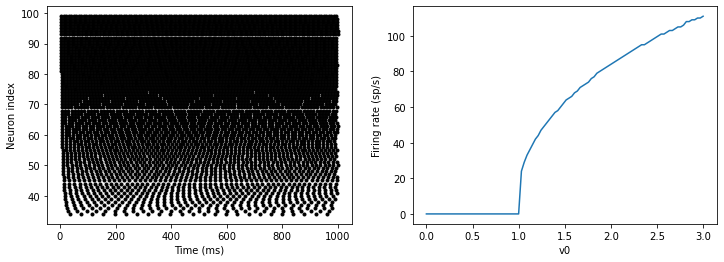

In [12]:
# Per neuron params
start_scope()

N = 100 
tau = 10*ms
v0_max = 3.
duration = 1000*ms
eqs = '''
dv/dt = (v0-v)/tau : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='exact')
G.v0 = 'i*v0_max/(N-1)' # v0 of each neuron from 0 to v0_max in steps of v0_max/(N-1)
M = SpikeMonitor(G)

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')

subplot(122)
plot(G.v0, M.count/duration) # Count the number of spikes (per second)
xlabel('v0')
ylabel('Firing rate (sp/s)')


Text(0, 0.5, 'Firing rate (sp/s)')

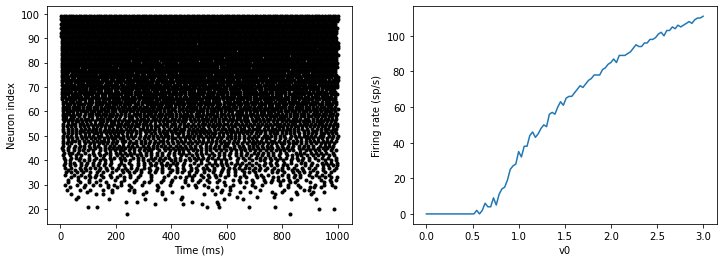

In [13]:
# Stochastic neurons
start_scope()

N = 100
tau = 10*ms
v0_max = 3.
duration = 1000*ms
sigma = 0.2

eqs = '''
dv/dt = (v0-v)/tau+sigma*xi*tau**-0.5 : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='euler')
M = SpikeMonitor(G)

G.v0 = 'i*v0_max/(N-1)'

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)')

Text(0, 0.5, 'Instantaneous firing rate (sp/s)')

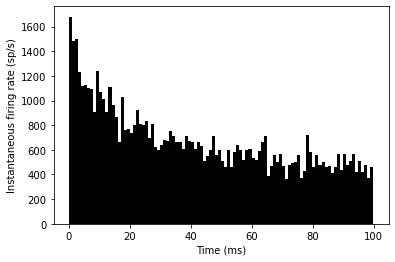

In [14]:
# Negative refactory value
start_scope()

N = 1000
tau = 10*ms
vr = -70*mV
vt0 = -50*mV
delta_vt0 = 5*mV
tau_t = 100*ms
sigma = 0.5*(vt0-vr)
v_drive = 2*(vt0-vr)
duration = 100*ms

eqs = '''
dv/dt = (v_drive+vr-v)/tau + sigma*xi*tau**-0.5 : volt
dvt/dt = (vt0-vt)/tau_t : volt
'''

reset = '''
v = vr
vt += delta_vt0
'''

G = NeuronGroup(N, eqs, threshold='v>vt', reset=reset, refractory=5*ms, method='euler')
spikemon = SpikeMonitor(G)

G.v = 'rand()*(vt0-vr)+vr'
G.vt = vt0

run(duration)

_ = hist(spikemon.t/ms, 100, histtype='stepfilled', facecolor='k', weights=ones(len(spikemon))/(N*defaultclock.dt))
xlabel('Time (ms)')
ylabel('Instantaneous firing rate (sp/s)')